# Project Report
Group 60: Daniyal, Ruth, Thomas, Paul

## Predicting the Presence of heart disease based on data

### Introduction

   Heart disease commonly refers to reduced blood flow to the heart due to narrowed vessels. The most common heart disease is known as Coronary Artery Disease (CAD) where cholesterol deposits of plaque build up in the wall of the arteries[1]. The cosequence of narrowed arteries can lead to shortness of breath, chest pain, and eventually heart attacks. Thus the question we want to explore  is: **Can we use the heart disease data containing the different attributes of each patient to predict whether a future patient with certain attributes shows a diameter narrowing of <50% or >50%?**
   
   The heart dataset we will be using is a multivariate data set with 76 attributes. Out of those 76, we have chosen 12 attributes by eliminating the columns that are numerical, irrelevant, and have NA values greater than 20% as shown below. 11 out of the 12 chosen attributes will be the predictors for the classification of the last attribute (diagnosis of heart disease). The output variable of the classification will predict a value of 0 or 1 where Value 0: < 50% diameter narrowing (heart disease) and Value 1: > 50% diameter narrowing (no heart disease). 

##### Excluded variables
Only a small portion of these 90 variables are useful in our classification. The rest have been excluded for various reasons, as explained in the following table.
| Reason for exclusion | Variables excluded for this reason |
| -------------------- | -----------------------------------|
| Irrelevant (for instance, dates) | id, ccf, ekgmo, ekgday, ekgyr, cmo, cday, cyr, name |
| Categorical variable (more than 2 categories) | cp, restecg, proto, slope, restwm, exerwm, thal, lmt, ladprox, laddist, diag, cxmain, ramus, om1, om2, rcaprox, rcadist |
| Categorical variable (2 categories, true/false etc.) | sex, painloc, painexer, relrest, smoke, fbs, dm, famhist, dig, prop, nitr, pro, diuretic, exang, xhypo |
| Too few possible values (for instance, small integers only) | pncaden, ca |
| No documentation | htn, dummy, junk, restckm, exerckm, thalsev, thalpul, earlobe, lvx1, lvx2, lvx3, lvx4, lvf, cathef, junk |
| Too many NA values | cigs, years, thaltime, rldv5, rldv5e, restef, exeref |

##### Included Variables 
The 12 variables we have chosen to classify the output variable
|   Chosen Variable    |      Description of Variable       |
| -------------------- | -----------------------------------|
| age | |
| chol(cholesterol) |  |
| thaldur (Duration of exercise test in minutes) |  |
| met (Metabolic Equivalence)  |  |
| thalach (Maximum Heart Rate Achieved in bpm)  | |
| thalrest (Resting Heart Rate in bpm) | |
| tpeakbps (Peak Exercise Blood Pressure in part 1) | |
| tpeakbpd (Peak Exercise Blood Pressure in part 2 | |
| trestbps (Resting Blood Pressure in Admission to Hospital) | |
| trestbpd (Resting Blood Pressure) | |
| oldpeak (ST depression induced by exercise relative to rest) | |
| disease  | |

### Methods & Results
Our analysis makes use of the `repr`, `tidyverse`, and `tidymodels` packages in R.

### Methods & Results
Our analysis makes use of the `repr`, `tidyverse`, `tidymodels`, and `GGally` packages in R. The data we are using is the Heart Disease dataset (specifically, `new.data`) from the UCI Machine Learning Repository.

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(GGally)
options(repr.matrix.max.cols = 100, repr.matrix.max.rows = 6)
options(repr.plot.width = 8, repr.plot.height = 7)
set.seed(9248)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
heart_raw <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/new.data",
                        col_names = FALSE, na = "-9") |>
    separate(X7, c("X7", "X8"), sep = " ", convert = TRUE) |>
    mutate(across(everything(), ~ifelse(.x < 0, NA, .x)))
heart_raw

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 18492 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
chr (2): X3, X7
dbl (5): X1, X2, X4, X5, X6

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 2303 rows [12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180, 192, 204, 216, 228, 240, ...].”


X1,X2,X3,X4,X5,X6,X7,X8
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15943882,63,1,NA,NA,NA,NA
NA,1,145,1,233,NA,50,20
1,0,1,2,2,3,1981,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,1,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,Takacs,NA,NA,NA,NA,NA


The data comes as a very untidy text file, with each observation consisting of twelve rows. According to the documentation, missing values are represented by `-9`, although other negative numbers present in the data also represent missing values. Here, we have rearranged the data and added column names specified by the documentation.

In [3]:
row_count <- nrow(heart_raw) / 12
row_indexes <- tibble(id = rep(1:row_count, each = 12), Y = rep(1:12, times = row_count))
heart_indexed <- bind_cols(row_indexes, heart_raw)
heart_wide <- heart_indexed |>
    pivot_wider(names_from = Y, values_from = X1:X8, names_vary = "slowest") |>
    select(!c(id, X8_1, X4_12:X8_12)) |>
    type_convert()
colnames(heart_wide) <- c("id", "ccf", "age", "sex", "painloc", "painexer", "relrest", "pncaden", "cp", "trestbps",
                          "htn", "chol", "smoke", "cigs", "years", "fbs", "dm", "famhist", "restecg", "ekgmo",
                          "ekgday", "ekgyr", "dig", "prop", "nitr", "pro", "diuretic", "proto", "thaldur", "thaltime",
                          "met", "thalach", "thalrest", "tpeakbps", "tpeakbpd", "dummy", "trestbpd", "exang", "xhypo", "oldpeak",
                          "slope", "rldv5", "rldv5e", "ca", "restckm", "exerckm", "restef", "restwm", "exeref", "exerwm",
                          "thal", "thalsev", "thalpul", "earlobe", "cmo", "cday", "cyr", "num", "lmt", "ladprox",
                          "laddist", "diag", "cxmain", "ramus", "om1", "om2", "rcaprox", "rcadist", "lvx1", "lvx2",
                          "lvx3", "lvx4", "lvf", "cathef", "junk1", "junk2", "junk3", "junk4", "junk5", "junk6",
                          "junk7", "junk8", "junk9", "junk10", "junk11", "junk12", "junk13", "junk14", "junk15", "name")
heart_wide
heart_na <- heart_wide |>
    map_df(\(x) sum(is.na(x)))
heart_na


── Column specification ────────────────────────────────────────────────────────
cols(
  X3_1 = col_double(),
  X3_2 = col_double(),
  X3_3 = col_double(),
  X3_4 = col_double(),
  X3_5 = col_double(),
  X3_6 = col_double(),
  X3_7 = col_double(),
  X3_8 = col_double(),
  X3_9 = col_double(),
  X3_10 = col_double(),
  X3_11 = col_double(),
  X3_12 = col_character()
)



id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,ekgmo,ekgday,ekgyr,dig,prop,nitr,pro,diuretic,proto,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,ca,restckm,exerckm,restef,restwm,exeref,exerwm,thal,thalsev,thalpul,earlobe,cmo,cday,cyr,num,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk1,junk2,junk3,junk4,junk5,junk6,junk7,junk8,junk9,junk10,junk11,junk12,junk13,junk14,junk15,name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,15943882,63,1,NA,NA,NA,NA,1,145,1,233,NA,50,20,1,0,1,2,2,3,1981,0,0,0,0,0,1,10.5,6,13,150,60,190,90,145,85,0,0,2.3,3,NA,NA,0,NA,NA,NA,NA,NA,NA,6,NA,NA,NA,2,16,1981,0,1,1,1,NA,1,NA,1,NA,1,1,1,1,1,1,1,NA,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,0,name
2,15964847,67,1,NA,NA,NA,NA,4,160,1,286,NA,40,40,0,0,1,2,3,5,1981,0,1,0,0,0,1,9.5,6,13,108,64,160,90,160,90,1,0,1.5,2,NA,NA,3,NA,NA,NA,NA,NA,NA,3,NA,NA,NA,2,5,1981,2,1,2,2,NA,2,NA,1,NA,1,1,1,1,1,1,1,NA,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,0,name
3,15952199,67,1,NA,NA,NA,NA,4,120,1,229,NA,20,35,0,0,1,2,2,19,1981,0,1,0,0,0,1,8.5,6,10,129,78,140,80,120,80,1,0,2.6,2,NA,NA,2,NA,NA,NA,NA,NA,NA,7,NA,NA,NA,2,20,1981,1,1,1,1,NA,1,NA,1,NA,2,2,1,1,1,7,3,NA,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,0,name
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1668,13203,57,1,1,NA,NA,NA,4,130,0,305.69,NA,NA,NA,0,0,NA,0,5,10,1989,0,0,0,0,0,100,10,4,5.0,105,67,210,120,130,80,0,0,4,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,3,NA,NA,2,NA,NA,NA,2,NA,NA,2,1,1,5,6,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Torok
1669,14205,47,1,1,NA,NA,NA,4,100,0,127.05,NA,NA,NA,0,0,NA,0,2,22,1989,0,0,0,0,0,100,10,NA,5.0,135,90,180,90,100,60,0,0,0,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,1,1,1,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Veszelsz
1670,15403,36,1,1,NA,NA,NA,3,120,0,221.76,NA,NA,NA,0,0,NA,0,3,2,1989,0,0,0,0,0,150,19,NA,7.5,147,76,180,85,120,80,0,0,0,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,1,1,1,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Takacs


id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,smoke,cigs,years,fbs,dm,famhist,restecg,ekgmo,ekgday,ekgyr,dig,prop,nitr,pro,diuretic,proto,thaldur,thaltime,met,thalach,thalrest,tpeakbps,tpeakbpd,dummy,trestbpd,exang,xhypo,oldpeak,slope,rldv5,rldv5e,ca,restckm,exerckm,restef,restwm,exeref,exerwm,thal,thalsev,thalpul,earlobe,cmo,cday,cyr,num,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk1,junk2,junk3,junk4,junk5,junk6,junk7,junk8,junk9,junk10,junk11,junk12,junk13,junk14,junk15,name
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,6,0,0,446,769,779,789,1,58,44,200,1140,890,899,92,0,871,2,148,153,148,180,178,181,177,222,208,55,654,150,151,153,162,167,158,159,157,159,174,403,1059,1059,1232,1541,1541,1479,1480,1537,1535,1142,1479,1523,1541,496,494,497,0,905,714,815,1192,748,1255,855,1249,734,832,260,261,262,261,39,1084,1420,54,1499,1504,1374,1541,1541,1450,1541,1541,1454,51,51,51,51,0


In [4]:
heart <- heart_wide |>
    select(age, chol, thaldur, met, thalach, thalrest, tpeakbps, tpeakbpd, trestbps, trestbpd, oldpeak, num) |>
    mutate(disease = as.logical(num), .keep = "unused") |>
    drop_na()
heart_split <- initial_split(heart, strata = disease)
heart_testing <- testing(heart_split)
heart_training <- training(heart_split)
heart_training

age,chol,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbps,trestbpd,oldpeak,disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
63,233,10.5,13,150,60,190,90,145,85,2.3,FALSE
37,250,13.0,17,187,84,195,68,130,78,3.5,FALSE
41,204,7.0,9,172,71,160,74,130,86,1.4,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
51,300.30,8,3.5,120,90,162,90,140,80,0,TRUE
61,250.25,1,1.5,75,58,150,90,120,80,1,TRUE
57,305.69,10,5.0,105,67,210,120,130,80,4,TRUE


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



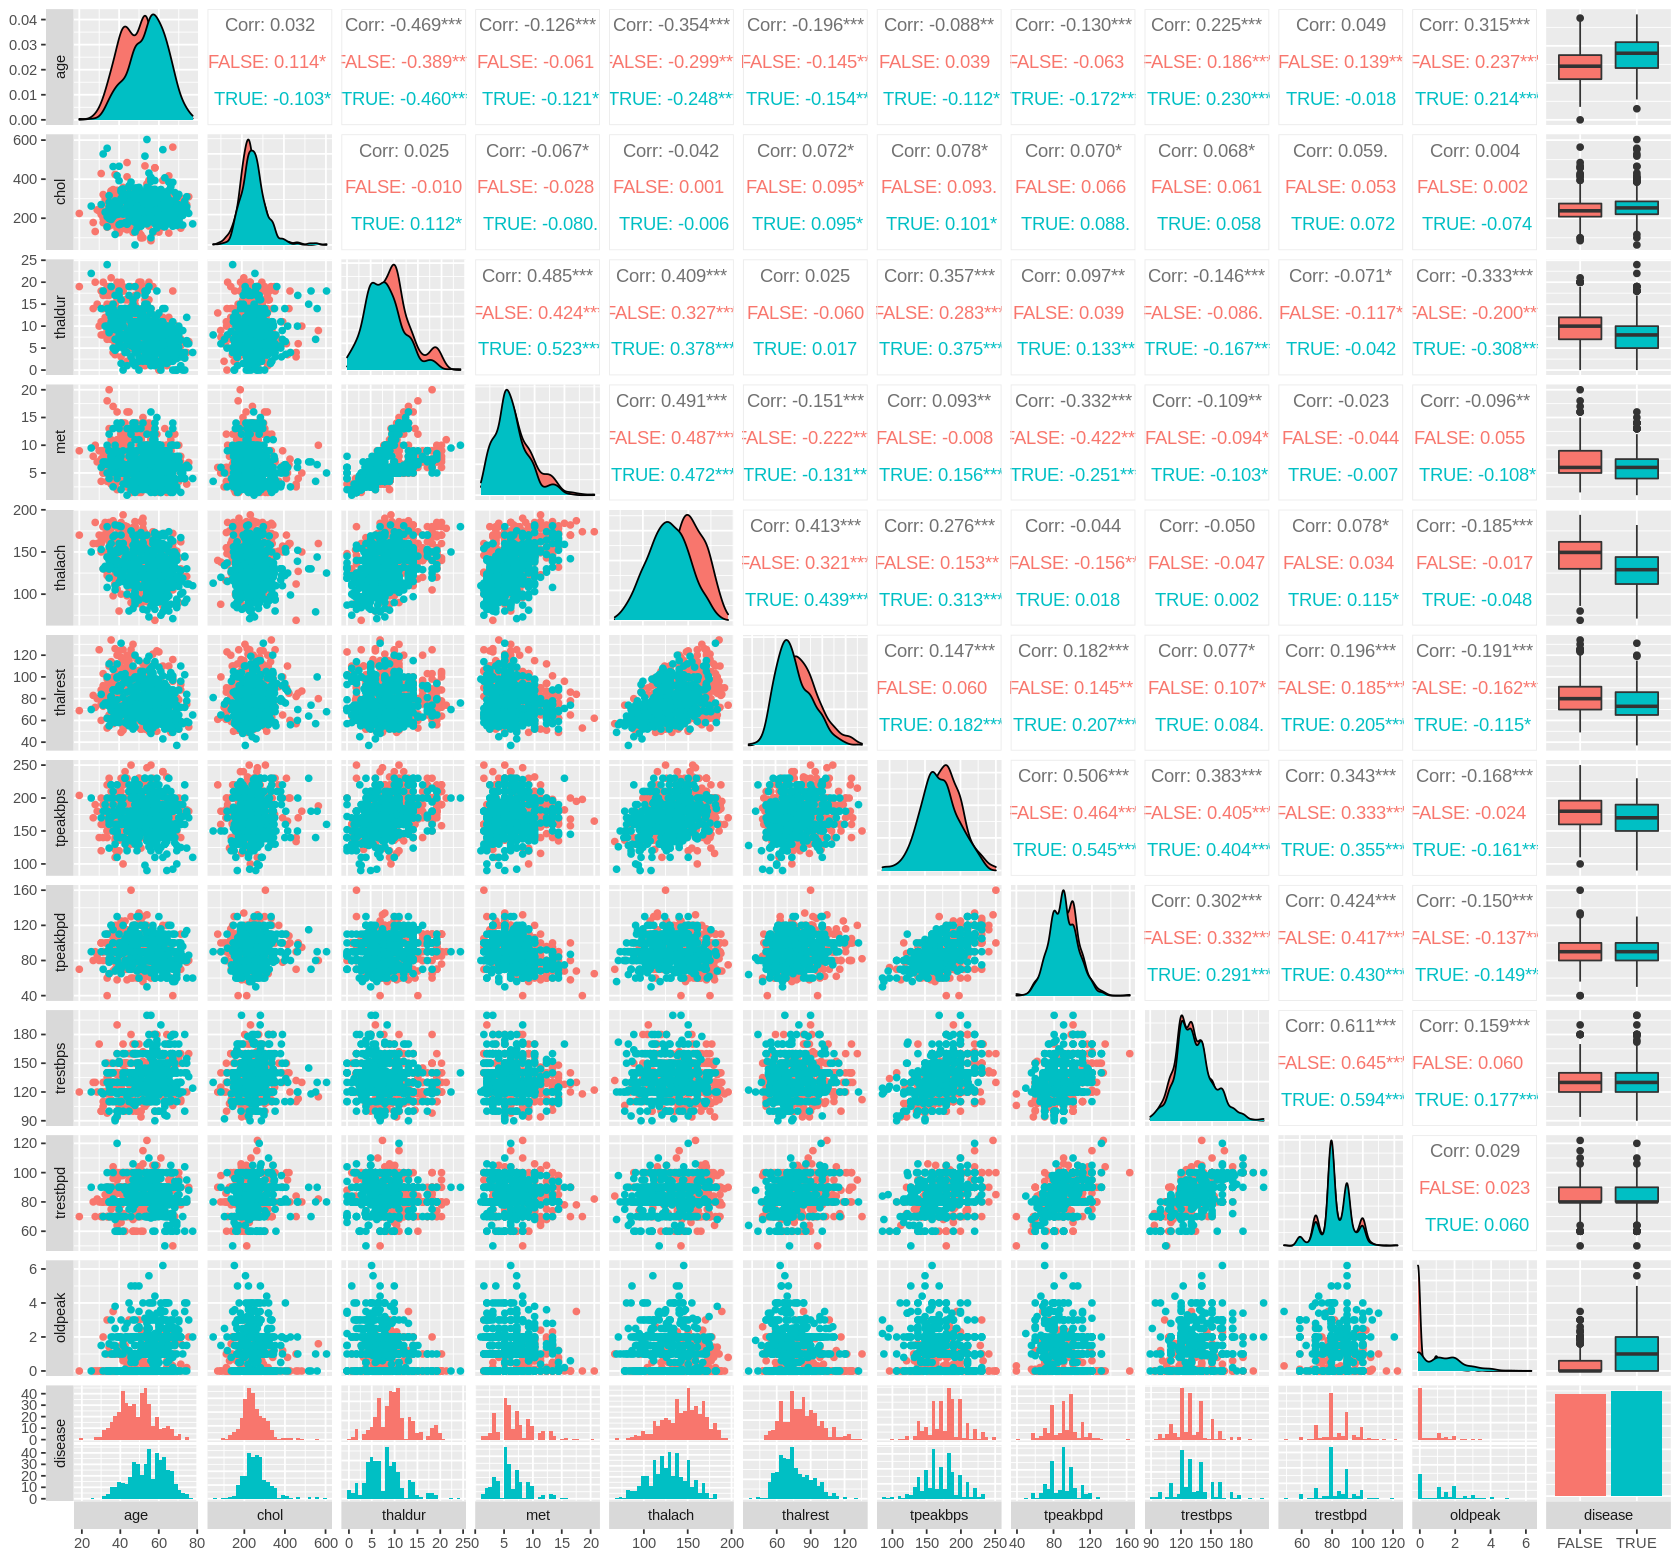

In [5]:
heart_pairs <- heart_training |>
    ggpairs(aes(colour = disease), switch = "both")
options(repr.plot.width = 14, repr.plot.height = 13)
heart_pairs

### Discussion

### References


[1]https://www.cdc.gov/heartdisease/about.htm#:~:text=The%20term%20%E2%80%9Cheart%20disease%E2%80%9D%20refers,can%20cause%20a%20heart%20attack.

